In [1]:
#import necessary modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
#load the energy density and flow profiles, and freezeout radii 
#note that the physics here is rotationally invariant
#we can exploit this to copy each profile 3 times, by rotating by 90 degrees each time
#and using the same radius 

scaler = StandardScaler()

n_profiles = 100
e_profiles = []
u_profiles = []
radii = []
for i in range(n_profiles):
    e = np.loadtxt('profiles_and_radii/' + str(i) + '/e_projection.dat-0.dat')
    u = np.loadtxt('profiles_and_radii/' + str(i) + '/u_tau_projection.dat-0.dat')
    
    #first let's cut of the edges of these profiles (empty space)
    #and coarse grain the profiles by a factor of 4
    e = e[70:270:4,70:270:4]
    u = u[70:270:4,70:270:4]    
    
    e_profiles.append(e)
    e_profiles.append( np.rot90(e) )
    e_profiles.append( np.rot90( np.rot90(e) ) )
    e_profiles.append( np.rot90( np.rot90(np.rot90(e) ) ) )
    
    u_profiles.append(u)
    u_profiles.append( np.rot90(u) )
    u_profiles.append( np.rot90( np.rot90(u) ) )
    u_profiles.append( np.rot90( np.rot90( np.rot90(u) ) ) )
   
    
    try :
        r = np.loadtxt('profiles_and_radii/' + str(i) + '/radius.dat-0.dat')
        radii.append(r)
        radii.append(r)
        radii.append(r)
        radii.append(r)
    except :
        radii.append(0.) #no radius file exists when radius is zero (no freezeout surface)
        radii.append(0.)
        radii.append(0.)
        radii.append(0.)
        

e_profiles = np.array(e_profiles)
u_profiles = np.array(u_profiles)
radii = np.array(radii)

In [3]:
#get the dimensions of each image
profile_shape = e_profiles[0].shape
n_profiles *= 4 #4 copies of each profile for 4 orienatation angles 

radius = 10.737995491


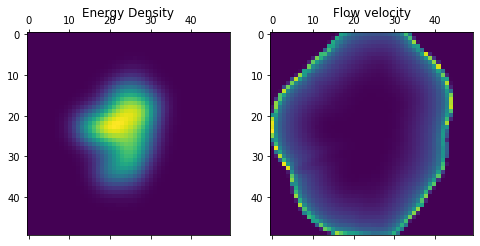

In [4]:
#lets look at an energy density and flow profile
choice = 9
plt.figure(figsize=(8,8))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
ax1.matshow(e_profiles[choice])
ax1.set_title("Energy Density")
ax2.matshow(u_profiles[choice])
ax2.set_title("Flow velocity")
print("radius = " + str(radii[choice]))

In [5]:
#Lets first try to train a model using only the energy density
#our features are the energy density profile, and 'labels' are the radii
from sklearn.model_selection import train_test_split
X = e_profiles
y = radii

#reshape the features to 2D array 
X = X.reshape((n_profiles, profile_shape[0]**2))

#use standard scaling 
#X = scaler.fit_transform(X)
#y = scaler.fit_transform(y)
    
#split into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

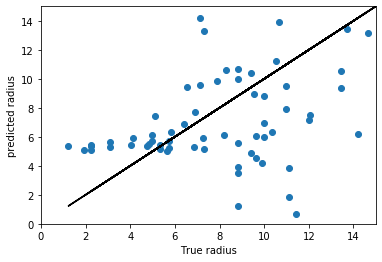

In [6]:
#first we can try Support Vector Machines for SVM Regression
from sklearn import svm
svr_linear_model = svm.SVR(kernel='linear', gamma='auto')
svr_linear_model.fit(X_train, y_train)
svr_linear_predictions = svr_linear_model.predict(X_test)
plt.scatter(y_test, svr_linear_predictions)
plt.plot(y_test, y_test, color='black')
plt.xlim(0,15)
plt.ylim(0,15)
plt.xlabel('True radius')
plt.ylabel('predicted radius')
plt.show()

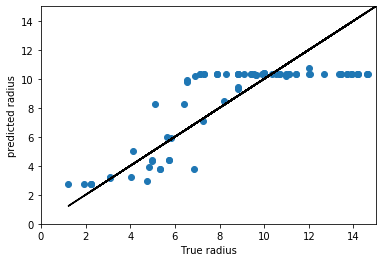

In [7]:
svr_rbf_model = svm.SVR(kernel='rbf', gamma='auto')
svr_rbf_model.fit(X_train, y_train)
svr_rbf_predictions = svr_rbf_model.predict(X_test)
plt.scatter(y_test, svr_rbf_predictions)
plt.plot(y_test, y_test, color='black')
plt.xlim(0,15)
plt.ylim(0,15)
plt.xlabel('True radius')
plt.ylabel('predicted radius')
plt.show()

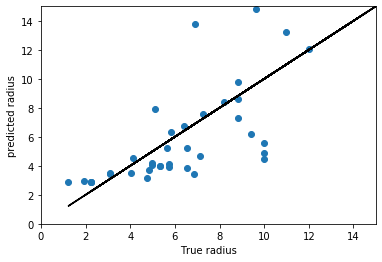

In [8]:
svr_poly_model = svm.SVR(kernel='poly', gamma='auto', degree=3, epsilon=.5,
               coef0=1)
svr_poly_model.fit(X_train, y_train)
svr_poly_predictions = svr_poly_model.predict(X_test)
plt.scatter(y_test, svr_poly_predictions)
plt.plot(y_test, y_test, color='black')
plt.xlim(0,15)
plt.ylim(0,15)
plt.xlabel('True radius')
plt.ylabel('predicted radius')
plt.show()

In [9]:
#try CNN
"""
import keras
from keras.datasets import fashion_mnist 
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

X_train = X_train.reshape(-1, 341,341, 1)
X_test = X_test.reshape(-1, 341,341, 1)

cnn_model = Sequential()
cnn_model.add(Conv2D(64, (3,3), input_shape=(341, 341, 1)))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
#cnn_model.add(Conv2D(64, (3,3)))
#cnn_model.add(Activation('relu'))
#cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64))
cnn_model.add(Dense(1))
cnn_model.add(Activation('softmax'))
cnn_model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

cnn_model.fit(X_train, y_train, batch_size=64, epochs=10)
"""

"\nimport keras\nfrom keras.datasets import fashion_mnist \nfrom keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D\nfrom keras.models import Sequential\nfrom keras.utils import to_categorical\nimport numpy as np\nimport matplotlib.pyplot as plt\n\nX_train = X_train.reshape(-1, 341,341, 1)\nX_test = X_test.reshape(-1, 341,341, 1)\n\ncnn_model = Sequential()\ncnn_model.add(Conv2D(64, (3,3), input_shape=(341, 341, 1)))\ncnn_model.add(Activation('relu'))\ncnn_model.add(MaxPooling2D(pool_size=(2,2)))\n#cnn_model.add(Conv2D(64, (3,3)))\n#cnn_model.add(Activation('relu'))\n#cnn_model.add(MaxPooling2D(pool_size=(2,2)))\ncnn_model.add(Flatten())\ncnn_model.add(Dense(64))\ncnn_model.add(Dense(1))\ncnn_model.add(Activation('softmax'))\ncnn_model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])\n\ncnn_model.fit(X_train, y_train, batch_size=64, epochs=10)\n"

In [10]:
"""
cnn_predictions = cnn_model.predict(X_test)
plt.scatter(y_test, cnn_predictions)
plt.plot(y_test, y_test, color='black')
plt.xlim(0,12)
plt.ylim(0,12)
plt.xlabel('True radius')
plt.ylabel('predicted radius')
plt.show()
"""

"\ncnn_predictions = cnn_model.predict(X_test)\nplt.scatter(y_test, cnn_predictions)\nplt.plot(y_test, y_test, color='black')\nplt.xlim(0,12)\nplt.ylim(0,12)\nplt.xlabel('True radius')\nplt.ylabel('predicted radius')\nplt.show()\n"